In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


C:\Users\gandh\AppData\Local\Temp\ipykernel_13496\3147024104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap = 'Blues')


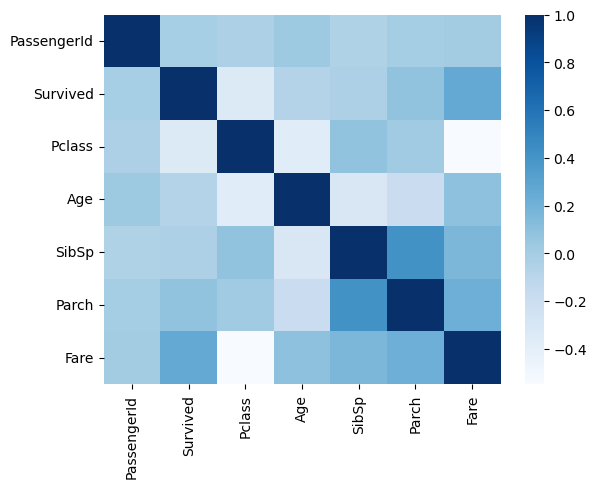

In [7]:
sns.heatmap(data.corr(),cmap = 'Blues')
plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices,test_indices in split.split(data,data[["Survived","Pclass","Sex"]]):
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]

<Axes: >

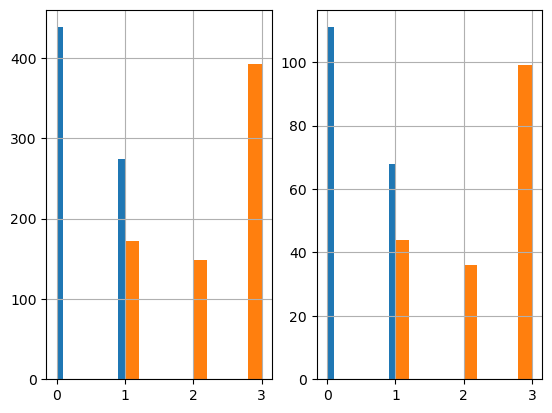

In [9]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set['Pclass'].hist()



In [10]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 842 to 376
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## estimators

In [11]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y =None):
        return self
    
    def transform(self,X):
        imputer = SimpleImputer(strategy = 'mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [12]:
from sklearn.preprocessing import OneHotEncoder 

class FeatureEncoder(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        
        column_names=['C','S','Q','N']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ['Female','Male']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [13]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis = 1,errors = "ignore")

In [14]:
from sklearn.pipeline import Pipeline

Pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])


In [15]:
strat_train_set = Pipeline.fit_transform(strat_train_set)

In [16]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
842,843,1,1,30.0,0,0,31.00,1.0,0.0,0.0,1.0,0.0
657,658,0,3,32.0,1,1,15.50,0.0,1.0,0.0,1.0,0.0
734,735,0,2,23.0,0,0,13.00,0.0,0.0,1.0,0.0,1.0
187,188,1,1,45.0,0,0,26.55,0.0,0.0,1.0,0.0,1.0
789,790,0,1,46.0,0,0,79.20,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,0,3,32.0,0,0,7.75,0.0,1.0,0.0,0.0,1.0
338,339,1,3,45.0,0,0,8.05,0.0,0.0,1.0,0.0,1.0
323,324,1,2,22.0,1,1,29.00,0.0,0.0,1.0,1.0,0.0
403,404,0,3,28.0,1,0,15.85,0.0,0.0,1.0,0.0,1.0


In [17]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 842 to 376
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [18]:
from sklearn.preprocessing import StandardScaler

X= strat_train_set.drop(["Survived"],axis = 1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [{
    "n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]

grid_search = GridSearchCV(clf,param_grid,cv = 3,scoring = "accuracy",return_train_score = True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [20]:
final_clf = grid_search.best_estimator_

In [21]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [22]:
strat_test_set = Pipeline.fit_transform(strat_test_set)

In [23]:
X_test = strat_test_set.drop(["Survived"],axis = 1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = y_test.to_numpy()

In [24]:
final_clf.score(X_data_test,Y_data_test)

0.8212290502793296

In [25]:
final_data =Pipeline.fit_transform(data)

In [26]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [27]:
X_final = final_data.drop(['Survived'],axis = 1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [28]:
prod_clf = RandomForestClassifier()

param_grid = [{
    "n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]

grid_search = GridSearchCV(prod_clf,param_grid,cv = 3,scoring = "accuracy",return_train_score = True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [29]:
prod_final_clf = grid_search.best_estimator_

In [30]:
titanic_test_data = pd.read_csv("test.csv")

In [32]:
final_test_data = Pipeline.fit_transform(titanic_test_data)

In [33]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method = "ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [34]:
predictions = prod_final_clf.predict(X_data_final_test)

In [36]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df['Survived'] = predictions

final_df.to_csv("BHARAT INTERN/predictions.csv",index = False)

OSError: Cannot save file into a non-existent directory: 'BHARAT INTERN'